In [12]:
import json
import pandas as pd
import numpy as np
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from datetime import date
import ast

### Functions

In [224]:
def dic_ext(var):
    business_df = business_data[~business_data[var].isna()]
    attributes_df = pd.DataFrame([x for x in business_df[var]])
    attributes_df = attributes_df.reset_index()
    business_df = business_df.reset_index()
    attributes_df = pd.concat([business_df['business_id'],attributes_df], axis = 1)
    print(attributes_df.shape)
    return attributes_df

In [223]:
def dict_ex(var):
    bp_lst = []
    bi_lst = []

    att_df = attributes_df[~attributes_df[var].isna()]
    att_df[var] = att_df[var].apply(ast.literal_eval)
    for i in range(att_df.shape[0]):
        a = att_df.iloc[i,:]
        if a[var] is not None:
            bp_lst.append(a[var])
            bi_lst.append(a['business_id'])
    atts_df = pd.DataFrame(bi_lst, columns = ['business_id'])
    atts_df[var] = bp_lst
    ats_df = pd.DataFrame([x for x in atts_df[var]])
    ats_df = pd.concat([atts_df['business_id'],ats_df], axis = 1)
    return ats_df

In [324]:
def fillna_vals(dset):
    for name in [col for col in dset.columns if 'business_id' not in col]:
        #print(name)
        dset[name] = dset[name].fillna('False')    
        dset[name] = dset[name].astype(str)
        dset[name] = dset[name].map(eval)        
        dset[name] = dset[name].fillna(False)  
        dset[name] = dset[name].astype('boolean')
        dset[name] = dset[name].fillna(False)  
        
    return dset

### Read in the data

In [325]:
businesss = pd.read_json("yelp_academic_dataset_business.json", lines=True, orient='columns', chunksize=100000)

for business in businesss:
    business_chunk = business
    break
    
print(business_chunk.shape)
print(list(business_chunk.columns))
business_chunk.head()    

(100000, 14)
['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours']


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


### Adjust the data

In [326]:
pd.crosstab(business_data.business_id == 'NaN', columns = 'Count')

col_0,Count
business_id,
False,3702


In [327]:
business_data = business_chunk[business_chunk.state == 'AB']
print(business_data.shape)
business_data = business_data[~business_data.business_id.isnull()]
business_data = business_data[~business_data.business_id.isna()]
print(business_data.shape)

(3702, 14)
(3702, 14)


In [356]:
attributes_df = dic_ext('attributes')    
hours_df = dic_ext('hours')    
#hours_df.head()

(3314, 38)
(3027, 9)


In [357]:
bp_att = dict_ex('BusinessParking')
music_att = dict_ex('Music')
bnight_att = dict_ex('BestNights')
hspec_att = dict_ex('HairSpecializesIn')
dres_att = dict_ex('DietaryRestrictions')
amb_att = dict_ex('Ambience')
gfm_atta = dict_ex('GoodForMeal')

#amb_att.head()

/var/folders/4t/t1tjs2gd7kzg3jkt5d1snhlh0000gn/T/ipykernel_962/2123440347.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  att_df[var] = att_df[var].apply(ast.literal_eval)
/var/folders/4t/t1tjs2gd7kzg3jkt5d1snhlh0000gn/T/ipykernel_962/2123440347.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  att_df[var] = att_df[var].apply(ast.literal_eval)
/var/folders/4t/t1tjs2gd7kzg3jkt5d1snhlh0000gn/T/ipykernel_962/2123440347.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [358]:
bp_atta = fillna_vals(bp_att)
music_atta = fillna_vals(music_att)
bnight_atta = fillna_vals(bnight_att)
hspec_atta = fillna_vals(hspec_att)
dres_atta = fillna_vals(dres_att)
amb_atta = fillna_vals(amb_att)
gfm_atta = fillna_vals(gfm_att)

In [359]:
#gfm_att.head()
#gfm_atta.info()

In [360]:
#business_df['dessert'] = business_df['dessert'].fillna(False)
#pd.crosstab(gfm_att['dessert'], columns = 'Count')

In [361]:
attributes_df = attributes_df.drop(['BusinessParking','Music','BestNights','HairSpecializesIn',
                                    'DietaryRestrictions','Ambience','GoodForMeal'], axis = 1)

att_cols = [col for col in attributes_df.columns if 'business_id' not in col]
att_cols.remove('RestaurantsPriceRange2')
att_cols.remove('index')
att_cols.remove('WiFi')
att_cols.remove('NoiseLevel')
att_cols.remove('RestaurantsAttire')
att_cols.remove('Alcohol')
att_cols.remove('Smoking')
att_cols.remove('AgesAllowed')

attributes_dfa = pd.DataFrame()

for name in att_cols:
    attributes_df[name] = attributes_df[name].fillna('False')    
    attributes_df[name] = attributes_df[name].astype(str)
    attributes_df[name] = attributes_df[name].map(eval)
    attributes_df[name] = attributes_df[name].astype('boolean')
    attributes_df[name] = attributes_df[name].fillna(False)  
    
attributes_dfa = attributes_df.copy()

In [376]:
business_df = pd.merge(business_data, attributes_df, on = 'business_id', how = 'left')
business_df = pd.merge(business_df, bnight_atta, on = 'business_id', how = 'left')
business_df = pd.merge(business_df, hours_df, on = 'business_id', how = 'left')
business_df = pd.merge(business_df, bp_atta, on = 'business_id', how = 'left')
business_df = pd.merge(business_df, music_atta, on = 'business_id', how = 'left')
business_df = pd.merge(business_df, hspec_atta, on = 'business_id', how = 'left')
business_df = pd.merge(business_df, dres_atta, on = 'business_id', how = 'left')
business_df = pd.merge(business_df, amb_atta, on = 'business_id', how = 'left')
business_df = pd.merge(business_df, gfm_atta, on = 'business_id', how = 'left')
 
print(business_df.shape)
#business_df.head()

(3702, 98)


In [377]:
business_df = business_df.drop(['attributes','hours'], axis = 1)


In [378]:
for name in ['WiFi','NoiseLevel', 'RestaurantsAttire', 'Alcohol', 'Smoking', 'AgesAllowed']:

    business_df[name] = business_df[name].str.replace("u'", '', regex=True)
    business_df[name] = business_df[name].str.replace('\W', '', regex=True)


In [391]:
business_df = business_df.drop(['index_x','index_y'], axis = 1)
print(list(business_df.columns))

['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'categories', 'OutdoorSeating', 'Caters', 'RestaurantsDelivery', 'RestaurantsGoodForGroups', 'RestaurantsPriceRange2', 'RestaurantsReservations', 'HasTV', 'GoodForKids', 'RestaurantsTakeOut', 'WiFi', 'NoiseLevel', 'RestaurantsAttire', 'Alcohol', 'BikeParking', 'Smoking', 'DogsAllowed', 'CoatCheck', 'WheelchairAccessible', 'RestaurantsTableService', 'HappyHour', 'ByAppointmentOnly', 'BYOB', 'DriveThru', 'AcceptsInsurance', 'BusinessAcceptsCreditCards', 'GoodForDancing', 'Open24Hours', 'Corkage', 'AgesAllowed', 'monday', 'tuesday', 'friday', 'wednesday', 'thursday', 'sunday', 'saturday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'garage', 'street', 'validated', 'lot', 'valet', 'dj', 'background_music', 'no_music', 'jukebox', 'live', 'video', 'karaoke', 'perms', 'coloring', 'extensions', 'curly', 'kids', 'dairy-free', 'gluten-f

In [380]:
for i in range(business_df.shape[1]):
    print(f"The number of unique classes for {business_df.columns[i]} is {business_df.iloc[:,i].nunique()}")
    if business_df.iloc[:,i].nunique() < 15:
        print(f"    The classes are {business_df.iloc[:,i].unique()}")

The number of unique classes for business_id is 3702
The number of unique classes for name is 3041
The number of unique classes for address is 3522
The number of unique classes for city is 18
The number of unique classes for state is 1
    The classes are ['AB']
The number of unique classes for postal_code is 1712
The number of unique classes for latitude is 3502
The number of unique classes for longitude is 3503
The number of unique classes for stars is 9
    The classes are [4.  5.  4.5 3.5 2.  3.  2.5 1.5 1. ]
The number of unique classes for review_count is 152
The number of unique classes for is_open is 2
    The classes are [0 1]
The number of unique classes for categories is 2690
The number of unique classes for index_x is 3314
The number of unique classes for OutdoorSeating is 2
    The classes are <BooleanArray>
[False, <NA>, True]
Length: 3, dtype: boolean
The number of unique classes for Caters is 2
    The classes are <BooleanArray>
[True, False, <NA>]
Length: 3, dtype: boo

In [388]:
#pd.crosstab(business_df['extensions'], columns = 'Count')
#business_df.GoodForMeal.head()

In [384]:
for nam in list(business_df.columns):
    if str(business_df.dtypes[nam]) == 'boolean':
        business_df.loc[business_df[nam].isna(),nam] = False

In [389]:
#business_df.info()

In [392]:
a = pd.DataFrame(business_df.isna().mean().round(4) * 100, columns = ['Count'])
a[a.Count > 0]

,Count
RestaurantsPriceRange2,31.39
WiFi,61.72
NoiseLevel,69.83
RestaurantsAttire,67.88
Alcohol,68.31
Smoking,97.60
AgesAllowed,99.95
Monday,26.88
Tuesday,21.66
Wednesday,19.85


### Maps

In [9]:
Long = np.mean(business_data.longitude)
Lat = np.mean(business_data.latitude)

locations = list(zip(business_data.latitude, business_data.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=9)

FastMarkerCluster(data=locations).add_to(map1)

map1

In [10]:
m=folium.Map([Lat,Long],zoom_start=11)

HeatMap(business_data[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)

display(m)

<Figure size 1000x500 with 0 Axes>

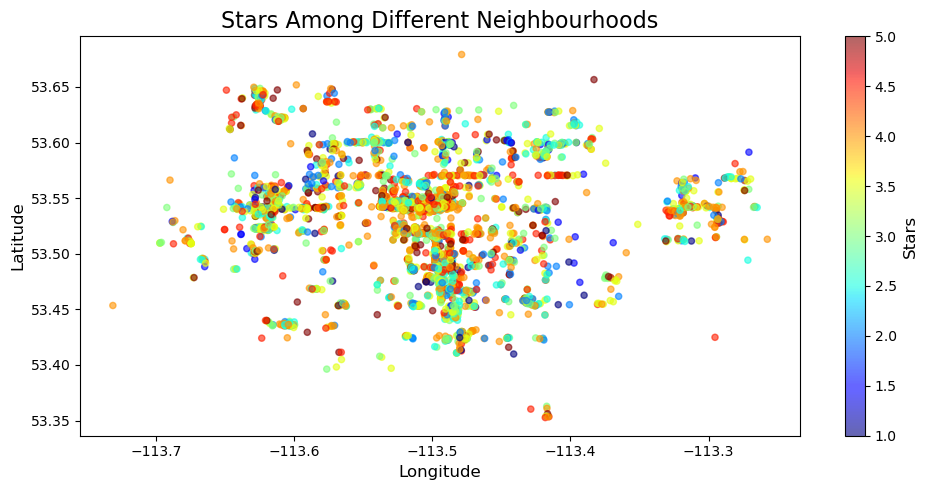

In [21]:
plt.figure(figsize=(10, 5))

# Create the scatter plot
viz_4 = business_data.plot(kind='scatter', x='longitude', y='latitude', label='Stars Among Different Neighbourhoods', 
                           c='stars',cmap='jet', colorbar=True, alpha=0.6, figsize=(10, 5), legend = False)

# Set plot title and labels
plt.title('Stars Among Different Neighbourhoods', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Adjust colorbar
colorbar = viz_4.collections[0].colorbar
colorbar.set_label('Stars', fontsize=12)

# Show the plot
#plt.legend(' ')
plt.tight_layout()
plt.show()

In [21]:
checkins = pd.read_json("yelp_academic_dataset_checkin.json", lines=True, orient='columns', chunksize=100000)

for checkin in checkins:
    checkin_chunk = checkin
    break
    
print(checkin_chunk.shape)
print(list(checkin_chunk.columns))
checkin_chunk.head()

(100000, 2)
['business_id', 'date']


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [20]:
tips = pd.read_json("yelp_academic_dataset_tip.json", lines=True, orient='columns', chunksize=100000)

for tip in tips:
    tips_chunk = tip
    break
    
print(tips_chunk.shape)
print(list(tips_chunk.columns))
tips_chunk.head()

(100000, 5)
['user_id', 'business_id', 'text', 'date', 'compliment_count']


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [19]:
reviews = pd.read_json("yelp_academic_dataset_review.json", lines=True, orient='columns', chunksize=100000)

for review in reviews:
    review_chunk = review
    break
    
print(review_chunk.shape)
print(list(review_chunk.columns))
review_chunk.head()

(100000, 9)
['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date']


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
